In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def read_accuracy_file(synthesis_results_file):
    lines = []
    with open(synthesis_results_file) as screen_outputs:
        lines = screen_outputs.readlines()

    # Obtain resources
    resources = dict.fromkeys(
        ['LUTs', 'FFs', 'DSPs', 'BRAMs', 'Frequency', 'Cycles'])
    resources['FFs'] = 0  # incase no registers
    for line in lines:
        if line[:6] == "  Luts":
            resources['LUTs'] = (int(line[29:-1]))
        elif line[:11] == "  Registers":
            resources['FFs'] = (int(line[29:-1]))
        elif line[:6] == "  DSPs":
            resources['DSPs'] = (int(line[29:-1]))
        elif line[:7] == "  BRAMs":
            resources['BRAMs'] = (int(line[29:-1]))
        elif line[:11] == "  Frequency":
            resources['Frequency'] = (float(line[29:-1]))
        elif line[:14] == "  Total cycles":
            resources['Cycles'] = (int(line[29:-7]))

    return resources

In [3]:
# https://stackoverflow.com/questions/22104256/does-matplotlib-have-a-function-for-drawing-diagonal-lines-in-axis-coordinates
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)

    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [4]:
def plot_results(benchmark_name, all=False):
    fig, axs = plt.subplots(nrows=2,
                            ncols=2+all,
                            figsize=(10, 6))

    # colors = ['#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c']
    # colors = (mpl.colormaps['tab10']).colors
    # colors = ['#a1cee2', '#0078b1', '#ffbf76', '#ff7f27', '#aedf8f', '#12a037']
    # markers = ['o', 'v', 'o', 'v', 'o', 'v']
    # formats = ['float32', 'float64',
    #            'posit32', 'posit64',
    #            #    'posit_float32', 'posit_float64'
    #            ]

    colors = ['#79B1D3', '#FEAF53', '#1f78b4', '#ff7f00']
    markers = ['o', 'o', 'v', 'v']
    formats = ['float32', 'posit32',
               'float64', 'posit64']

    for i, format in enumerate(formats):
        luts_list = []
        ffs_list = []
        dsps_list = []
        brams_list = []
        frequency_list = []
        cycles_list = []
        target_list = []

        for period in [20, 10, 6.66667, 5, 4, 3.3333]:
            df = read_accuracy_file(
                '../Bambu/' + benchmark_name + '/' + format + '/results_' + str(period) + '.txt')

            luts_list.append(df['LUTs'])
            ffs_list.append(df['FFs'])
            dsps_list.append(df['DSPs'])
            brams_list.append(df['BRAMs'])
            frequency_list.append(df['Frequency'])
            cycles_list.append(df['Cycles'])
            target_list.append(round(1000/period))

        # plot
        axs[0, 0].plot(target_list, luts_list, label=format,
                       color=colors[i], marker=markers[i])
        axs[0, 1].plot(target_list, ffs_list, label=format,
                       color=colors[i], marker=markers[i])
        axs[1, 0].plot(target_list, frequency_list,
                       label=format, color=colors[i], marker=markers[i])
        axs[1, 1].plot(target_list, cycles_list, label=format,
                       color=colors[i], marker=markers[i])
        if (all):
            axs[0, 2].plot(target_list, dsps_list,
                           label=format, color=colors[i], marker=markers[i])
            axs[1, 2].plot(target_list, brams_list,
                           label=format, color=colors[i], marker=markers[i])

    # Labels
    axs[0, 0].set_ylabel('LUTs')
    axs[0, 1].set_ylabel('FFs')
    axs[1, 0].set_ylabel('Max Frequency (MHz)')
    axs[1, 1].set_ylabel('Latency (cycles)')
    axs[1, 0].set_xlabel('Target Frequency (MHz)')
    axs[1, 1].set_xlabel('Target Frequency (MHz)')
    if (all):
        axs[0, 2].set_ylabel('DSPs')
        axs[1, 2].set_ylabel('BRAMs')
        axs[1, 2].set_xlabel('Target Frequency (MHz)')

    # Grid
    axs[0, 0].grid(zorder=0, )  # axis='y')
    axs[0, 1].grid(zorder=0, )  # axis='y')
    axs[1, 0].grid(zorder=0, )  # axis='y')
    axs[1, 1].grid(zorder=0, )  # axis='y')
    if (all):
        axs[0, 2].grid(zorder=0, )  # axis='y')
        axs[1, 2].grid(zorder=0, )  # axis='y')

    # Show target frequencies
    add_identity(axs[1, 0],
                 color='tab:gray',
                 linestyle='--',
                 linewidth=1,
                 zorder=0)

    # Adjust the spacing between the subplots
    fig.tight_layout()

    # Create a legend object for all subplots
    fig.legend(list(map(str.title, formats)), title='Format',
               loc='upper center', bbox_to_anchor=(0.5, 1.08),
               ncol=len(formats))

    plt.savefig('bambu_' + benchmark_name +
                '_synthesis.pdf', bbox_inches='tight')

    plt.show()

## Addition

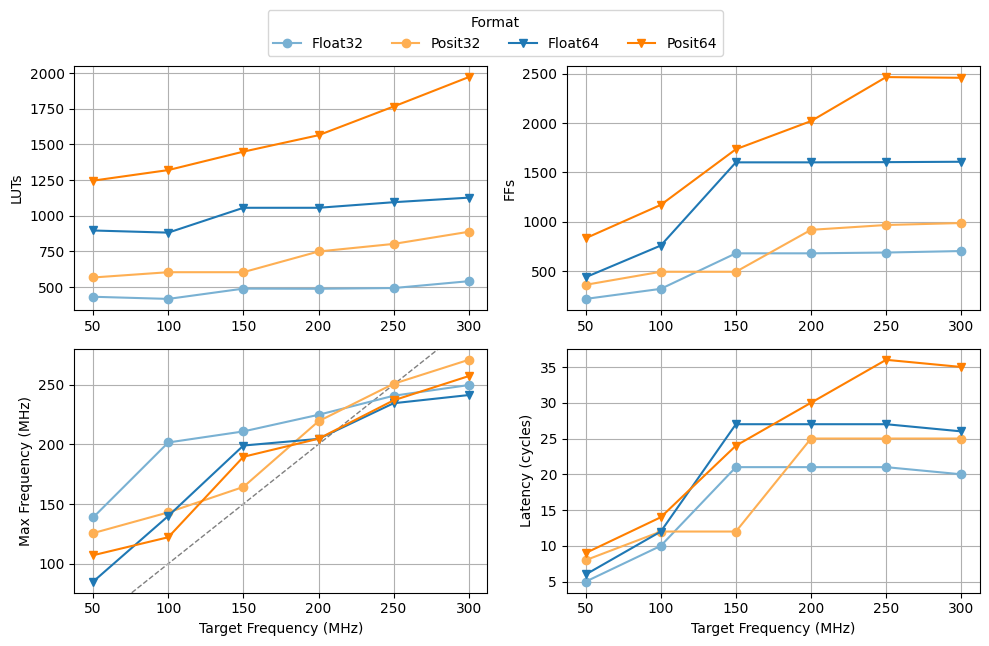


50 ns
[433, 568, 897, 1246]
[218, 361, 438, 833]
[138.73473917869035, 125.59658377292138, 84.96176720475786, 107.06638115631692]
[5, 8, 6, 9]

100 ns
[418, 605, 882, 1320]
[320, 493, 759, 1171]
[201.49103364900262, 142.9592566118656, 139.95801259622115, 122.14486380847686]
[10, 12, 12, 14]

150 ns
[490, 605, 1056, 1449]
[680, 493, 1602, 1735]
[210.7481559536354, 164.257555847569, 198.9258006763477, 189.50161076369147]
[21, 12, 27, 24]

200 ns
[489, 750, 1056, 1564]
[680, 918, 1602, 2020]
[224.6686137946529, 219.25016443762334, 204.4989775051125, 204.62451401677922]
[21, 25, 27, 30]

250 ns
[494, 803, 1095, 1765]
[688, 967, 1604, 2466]
[240.61597690086623, 250.62656641604008, 234.3566908835247, 236.79848448969926]
[21, 25, 27, 36]

300 ns
[542, 888, 1127, 1971]
[703, 987, 1608, 2459]
[249.56326428749685, 270.7092582566324, 241.196333815726, 257.0694087403599]
[20, 25, 26, 35]


In [11]:
benchmark_name = 'add'

# plot_results(benchmark_name, all=True)
plot_results(benchmark_name)

for period in [20, 10, 6.66667, 5, 4, 3.3333]:
    luts_list = []
    ffs_list = []
    dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []

    for format in ['float32', 'posit32', 'float64', 'posit64']:
        df = read_accuracy_file(
            '../Bambu/add/' + format + '/results_' + str(period) + '.txt')
        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])

    print(f'\n{round(1000/period)} ns')
    # print(frequency_list)
    for list_r in [luts_list, ffs_list, frequency_list, cycles_list]:
        # print(list_r[1]/list_r[0], list_r[3]/list_r[2])
        print(list_r)

## Multiplication

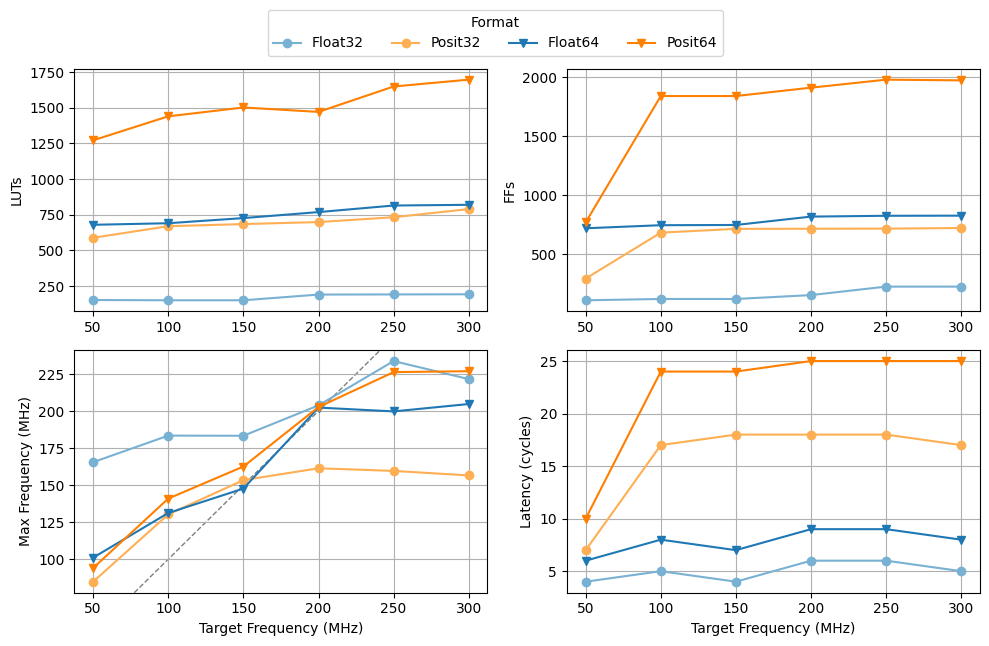


50.0 ns
[152, 588, 679, 1271]
[108, 292, 719, 769]
[165.48072149594574, 84.8032564450475, 101.0611419909045, 94.04683532399136]
[2, 2, 9, 12]
[4, 7, 6, 10]

100.0 ns
[150, 669, 690, 1439]
[119, 682, 745, 1841]
[183.38529249954152, 130.24225058609014, 131.16474291710387, 140.90460758066789]
[2, 2, 9, 12]
[5, 17, 8, 24]

149.9999250000375 ns
[150, 684, 726, 1501]
[119, 714, 747, 1841]
[183.2844574780059, 153.35071308081584, 147.64506127270045, 162.52234682268812]
[2, 2, 9, 12]
[4, 18, 7, 24]

200.0 ns
[190, 698, 768, 1470]
[152, 715, 818, 1912]
[203.7905033625433, 161.34236850596966, 202.30629172567268, 202.67531414673692]
[2, 2, 9, 12]
[6, 18, 9, 25]

250.0 ns
[191, 732, 814, 1648]
[224, 716, 825, 1980]
[233.69946249123626, 159.5659805329504, 199.72039145196726, 226.2443438914027]
[2, 2, 9, 12]
[6, 18, 9, 25]

300.0030000300003 ns
[192, 789, 819, 1696]
[224, 721, 826, 1974]
[221.5330084182543, 156.51901706057285, 204.7082906857728, 226.86025408348456]
[2, 2, 9, 12]
[5, 17, 8, 25]


In [12]:
plot_results('mult')

# Caution! DSPs used in this op.

# for format in ['float32', 'posit32', 'float64', 'posit64']:
#     dsps_list = []
#     for period in [20, 10, 6.66667, 5, 4, 3.3333]:
#         df = read_accuracy_file(
#             '../Bambu/mult/' + format + '/results_' + str(period) + '.txt')
#         dsps_list.append(df['DSPs'])

#     print(format)
#     print(dsps_list)

for period in [20, 10, 6.66667, 5, 4, 3.3333]:
    luts_list = []
    ffs_list = []
    dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []

    for format in ['float32', 'posit32', 'float64', 'posit64']:
        df = read_accuracy_file(
            '../Bambu/mult/' + format + '/results_' + str(period) + '.txt')
        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])

    print(f'\n{1000/period} ns')
    # print(frequency_list)
    for list_r in [luts_list, ffs_list, frequency_list, dsps_list, cycles_list]:
        # print(list_r[1]/list_r[0], list_r[3]/list_r[2])
        print(list_r)

## Division

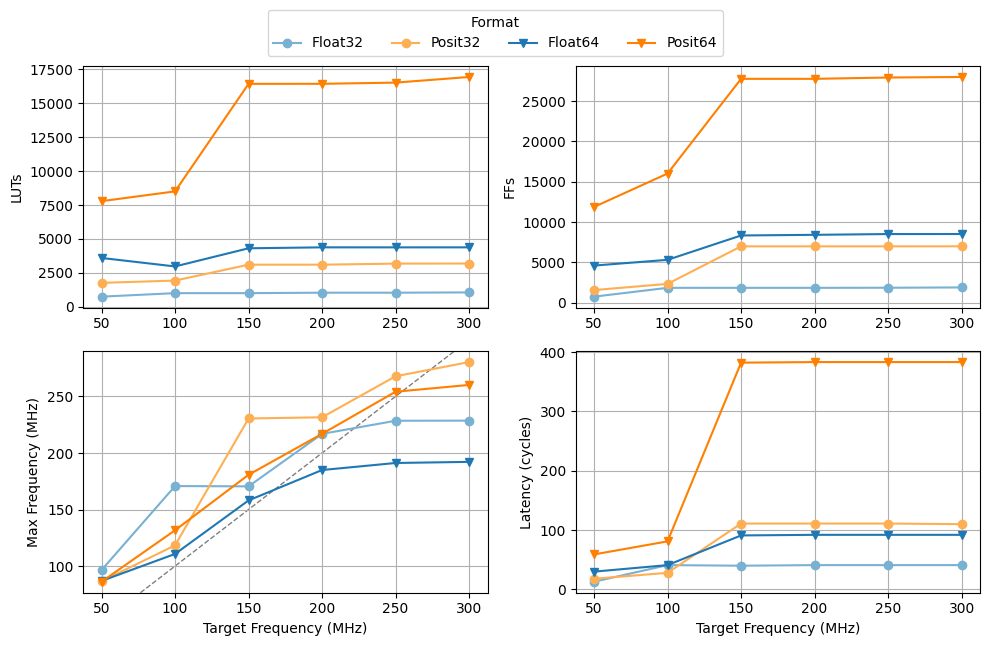

float32
[4, 7, 7, 7, 7, 7]
[0, 0, 0, 0, 0, 0]
posit32
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
float64
[0, 10, 14, 14, 14, 14]
[0, 0, 0, 0, 0, 0]
posit64
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]

50.0 ns
[96.46922631680495, 86.57259111765215, 86.85833405715279, 86.15490652192643]
2.3443708609271523 2.159955567897806
2.105691056910569 2.5838955386289446
0.8974114795255821 0.991901438786939
1.3846153846153846 1.9666666666666666

100.0 ns
[170.73587160662456, 118.32919181161992, 110.7297087808659, 131.66556945358786]
1.9131293188548866 2.8545515619751427
1.2680131004366813 3.0186546071226683
0.6930540764406579 1.189071757735352
0.6829268292682927 1.975609756097561

149.9999250000375 ns
[170.47391749062393, 230.46784973496196, 158.052789631737, 180.70112034694617]
3.0661401776900297 3.8049628942486087
3.811135371179039 3.333413346135382
1.351924406545287 1.1432959884351284
2.775 4.197802197802198

200.0 ns
[216.87269572760792, 231.535077564251, 184.91124260355028, 216.91973969631235]
2.969407265

In [7]:
plot_results('div')

# Caution! BRAMs used in this op.

for format in ['float32', 'posit32', 'float64', 'posit64']:
    brams_list = []
    dsps_list = []
    for period in [20, 10, 6.66667, 5, 4, 3.3333]:
        df = read_accuracy_file(
            '../Bambu/div/' + format + '/results_' + str(period) + '.txt')
        brams_list.append(df['BRAMs'])
        dsps_list.append(df['DSPs'])

    print(format)
    print(brams_list)
    print(dsps_list)


for period in [20, 10, 6.66667, 5, 4, 3.3333]:
    luts_list = []
    ffs_list = []
    dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []

    for format in ['float32', 'posit32', 'float64', 'posit64']:
        df = read_accuracy_file(
            '../Bambu/div/' + format + '/results_' + str(period) + '.txt')
        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])

    print(f'\n{1000/period} ns')
    print(frequency_list)
    for list_r in [luts_list, ffs_list, frequency_list, cycles_list]:
        print(list_r[1]/list_r[0], list_r[3]/list_r[2])

## Sqrt

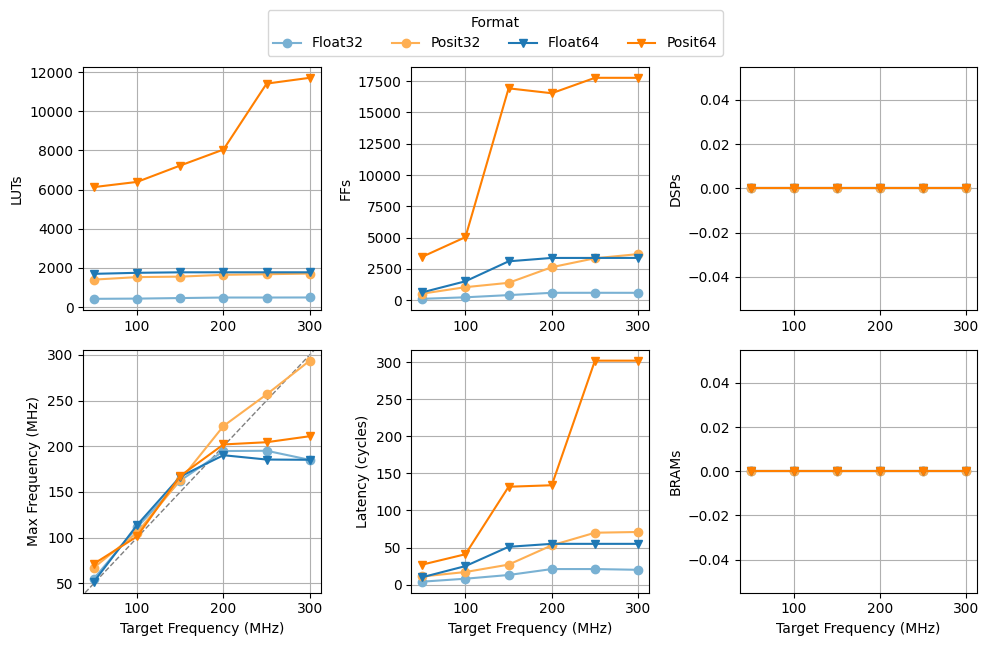

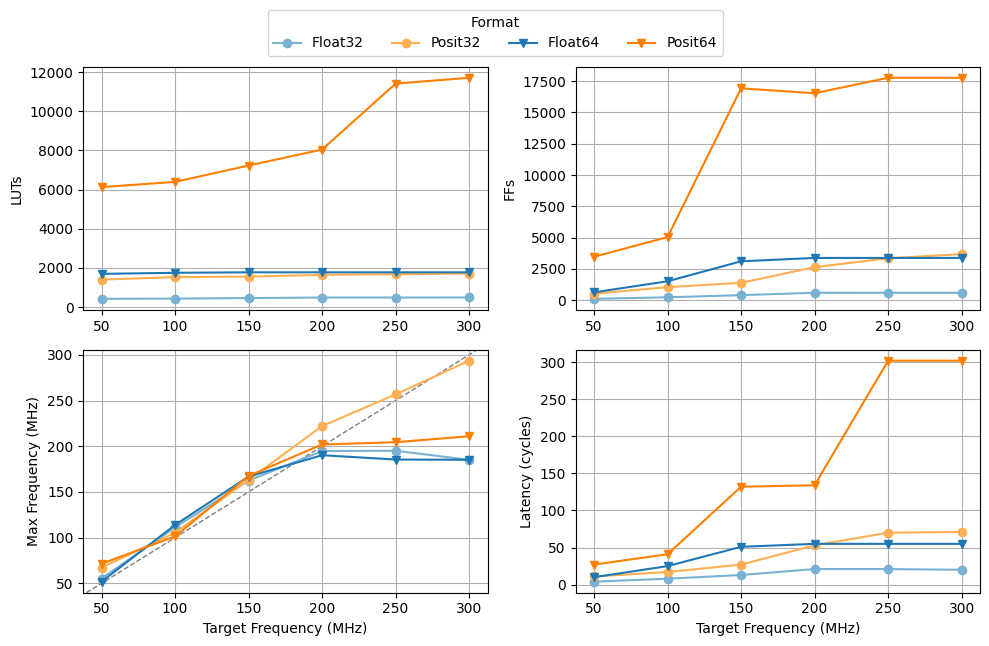


50.0 ns
[55.273048861375194, 67.20430107526882, 51.824212271973465, 71.44898542440697]
3.354916067146283 3.6180637544273906
4.754545454545455 5.535885167464115
1.2158602150537634 1.378679622749357
2.75 2.7

100.0 ns
[111.23470522803115, 105.50749103186327, 113.8563133325743, 101.31712259371835]
3.567757009345794 3.659988551803091
4.487068965517241 3.3333333333333335
0.9485123443764508 0.8898682877406282
2.125 1.64

149.9999250000375 ns
[162.3640201331385, 163.02575806977504, 166.83350016683352, 167.50418760469012]
3.4035087719298245 4.081264108352144
3.4211822660098523 5.448986160283232
1.0040756439517444 1.0040201005025124
2.076923076923077 2.588235294117647

200.0 ns
[194.70404984423675, 222.0741727737064, 190.15021867275146, 201.93861066235866]
3.4037267080745344 4.539199097574732
4.4711864406779664 4.8972460763991705
1.140572951365756 1.0619951534733443
2.5238095238095237 2.4363636363636365

250.0 ns
[195.0458357714063, 256.6735112936345, 185.42555164101614, 204.37359493153485]
3.

In [8]:
benchmark_name = 'sqrt'

plot_results(benchmark_name, all=True)
plot_results(benchmark_name)

for period in [20, 10, 6.66667, 5, 4, 3.3333]:
    luts_list = []
    ffs_list = []
    dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []

    for format in ['float32', 'posit32', 'float64', 'posit64']:
        df = read_accuracy_file(
            '../Bambu/sqrt/' + format + '/results_' + str(period) + '.txt')
        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])

    print(f'\n{1000/period} ns')
    print(frequency_list)
    for list_r in [luts_list, ffs_list, frequency_list, cycles_list]:
        print(list_r[1]/list_r[0], list_r[3]/list_r[2])

## Conversions


 posit2float float32
luts: 172
ffs: 244
brams: 0
frequency: 294.7244326554671
cycles: 8
target: 300

 float2posit float32
luts: 249
ffs: 227
brams: 0
frequency: 311.2356053532524
cycles: 11
target: 300

 posit2float float64
luts: 174
ffs: 214
brams: 0
frequency: 300.4807692307692
cycles: 7
target: 300

 float2posit float64
luts: 265
ffs: 301
brams: 0
frequency: 304.41400304414003
cycles: 11
target: 300


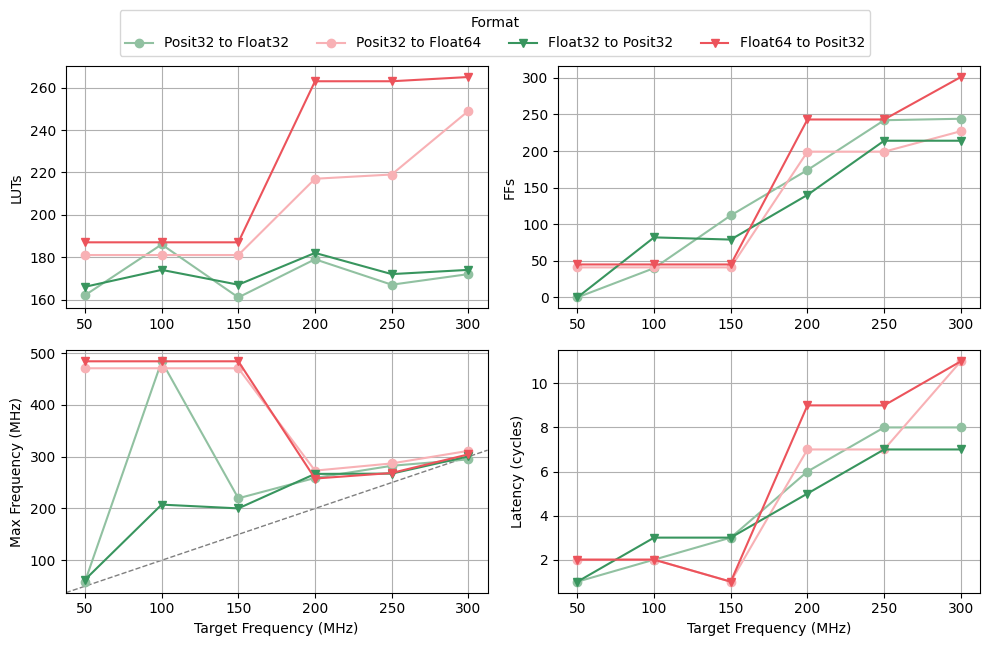

In [11]:
import itertools as it

fig, axs = plt.subplots(nrows=2,
                        ncols=2,
                        figsize=(10, 6))

benchmarks = ['posit2float', 'float2posit']

formats = ['float32', 'float64']

# colors = ['#c6b0d4', '#9667ba', '#c89c95', '#90564d']
# colors = ['#dcdb92', '#bdbd39', '#96dae4', '#00becd']
# colors = ['#c6b0d4', '#9667ba', '#b3cf72', '#8ba258']
colors = ['#91c1a1', '#f8b1b5', '#38955e', '#ec535b']
markers = ['o', 'o', 'v', 'v']

for i, (format, benchmark_name) in enumerate(it.product(formats, benchmarks)):
    luts_list = []
    ffs_list = []
    # dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []
    target_list = []

    for period in [20, 10, 6.66667, 5, 4, 3.3333]:
        df = read_accuracy_file(
            '../Bambu/' + benchmark_name + '/' + format + '/results_' + str(period) + '.txt')

        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        # dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])
        target_list.append(round(1000/period))

    print('\n', benchmark_name, format)
    print('luts:', luts_list[-1])
    print('ffs:', ffs_list[-1])
    # print('dsps:', dsps_list[-1])
    print('brams:', brams_list[-1])
    print('frequency:', frequency_list[-1])
    print('cycles:', cycles_list[-1])
    print('target:', target_list[-1])

    # plot
    axs[0, 0].plot(target_list, luts_list, label=format,
                   color=colors[i], marker=markers[i])
    axs[0, 1].plot(target_list, ffs_list, label=format,
                   color=colors[i], marker=markers[i])
    axs[1, 0].plot(target_list, frequency_list, label=format,
                   color=colors[i], marker=markers[i])
    axs[1, 1].plot(target_list, cycles_list, label=format,
                   color=colors[i], marker=markers[i])

# Labels
axs[0, 0].set_ylabel('LUTs')
axs[0, 1].set_ylabel('FFs')
axs[1, 0].set_ylabel('Max Frequency (MHz)')
axs[1, 1].set_ylabel('Latency (cycles)')
axs[1, 0].set_xlabel('Target Frequency (MHz)')
axs[1, 1].set_xlabel('Target Frequency (MHz)')
# Grid
axs[0, 0].grid(zorder=0, )  # axis='y')
axs[0, 1].grid(zorder=0, )  # axis='y')
axs[1, 0].grid(zorder=0, )  # axis='y')
axs[1, 1].grid(zorder=0, )  # axis='y')
# Show target frequencies
add_identity(axs[1, 0],
             color='tab:gray',
             linestyle='--',
             linewidth=1,
             zorder=0)

# Adjust the spacing between the subplots
fig.tight_layout()

# Create a legend object for all subplots
# fig.legend(list(map(str.title, formats)), title='Format',
#            loc='upper center', bbox_to_anchor=(0.5, 1.08),
#            ncol=len(formats))
fig.legend(['Posit32 to Float32', 'Posit32 to Float64', 'Float32 to Posit32', 'Float64 to Posit32'], title='Format',
           loc='upper center', bbox_to_anchor=(0.5, 1.08),
           ncol=4)


plt.savefig('bambu_converters_synthesis.pdf', bbox_inches='tight')

plt.show()